In [23]:
from skimage import data, img_as_float #Lưu trữ các ảnh có sẵn 
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt

Dùng ảnh có trong thư viện

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


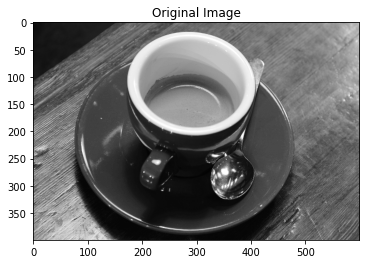

In [24]:
#dùng ảnh trong thư viện có sẵn
gray_images = { 
    "cat": rgb2gray(img_as_float(data.chelsea())),
    "coffee": rgb2gray(img_as_float(data.coffee())),
    "camera": rgb2gray(img_as_float(data.camera())),
    "wheel": rgb2gray(img_as_float(data.gravel()))
}

plt.imshow(gray_images["coffee"], cmap="gray")
plt.title("Original Image")
plt.show()

In [25]:
X = gray_images["coffee"]
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

j = 0
for r in range (1, 50, 1):
    # Xây dựng hình ảnh nén
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

Dùng hình ảnh mà mình muốn

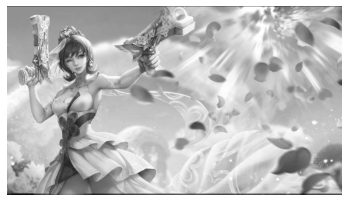

In [26]:
from matplotlib.image import imread
myimg = imread('violet.jpg')
#Chuyển sang ảnh trắng đen
X = np.mean(myimg, -1) 

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()


In [27]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

j = 0
for r in  range (1, 50, 1):
    #Xây dựng hình ảnh nén
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

Bảng xem tỉ lệ nén ảnh

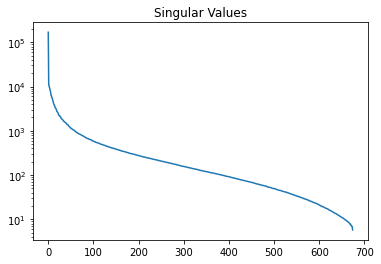

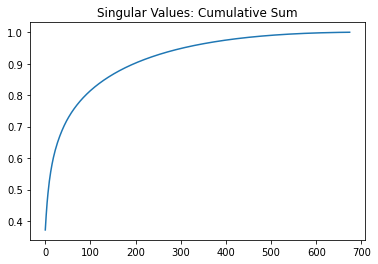

In [22]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()